In [35]:
import pandas as pd
car_data=pd.read_csv('Car Sell Dataset.csv')
car_data.head()

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654,1st,Rajasthan,No,547253
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351,1st,Maharashtra,No,512050
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090,3rd+,Tamil Nadu,No,678923
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979,1st,Andhra Pradesh,No,522500
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591,3rd+,Bihar,No,401182


In [36]:
car_data.size

1690848

In [37]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140904 entries, 0 to 140903
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Brand          140904 non-null  object
 1   Model Name     140904 non-null  object
 2   Model Variant  140904 non-null  object
 3   Car Type       140904 non-null  object
 4   Transmission   140904 non-null  object
 5   Fuel Type      140904 non-null  object
 6   Year           140904 non-null  int64 
 7   Kilometers     140904 non-null  int64 
 8   Owner          140904 non-null  object
 9   State          140904 non-null  object
 10  Accidental     140904 non-null  object
 11  Price          140904 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 12.9+ MB


In [38]:
car_data.columns

Index(['Brand', 'Model Name', 'Model Variant', 'Car Type', 'Transmission',
       'Fuel Type', 'Year', 'Kilometers', 'Owner', 'State', 'Accidental',
       'Price'],
      dtype='object')

In [39]:
car_data.rename(columns={'Price':'Price_inr'},inplace=True)

In [40]:
car_data.columns= car_data.columns.str.replace(' ','_')
car_data.columns= car_data.columns.str.lower()

In [41]:
car_data.describe()

,year,kilometers,price_inr
count,140904.000000,140904.000000,1.409040e+05
mean,2016.960391,95024.595987,7.617872e+05
std,5.106106,49133.157878,4.438578e+05
min,2000.000000,10000.000000,5.005500e+04
25%,2014.000000,52421.000000,4.116420e+05
50%,2018.000000,94973.500000,6.828030e+05
75%,2021.000000,137618.000000,1.034178e+06
max,2023.000000,179998.000000,2.744280e+06


In [42]:
car_data.isnull().sum()

brand            0
model_name       0
model_variant    0
car_type         0
transmission     0
fuel_type        0
year             0
kilometers       0
owner            0
state            0
accidental       0
price_inr        0
dtype: int64

In [43]:
car_data.reset_index(drop=True,inplace=True)
car_data.insert(0,'car_id',car_data.index+1)

In [45]:
car_data.duplicated().sum()

np.int64(0)

In [47]:
car_data['price_inr']=car_data['price_inr'].astype('float')
car_data['kilometers']=car_data['kilometers'].astype('float')

In [56]:
car_data

,car_id,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price_inr
0,1,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0
1,2,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0
2,3,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0
3,4,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0
4,5,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140899,140900,Mahindra,Scorpio,W11,SUV,Manual,Petrol,2002,62699.0,1st,Telangana,No,221067.0
140900,140901,Hyundai,i10,Era,Hatchback,Manual,Petrol,2013,47953.0,2nd,Maharashtra,No,745360.0
140901,140902,Honda,Jazz,V,Sedan,Automatic,Diesel,2009,134566.0,3rd+,Odisha,No,122852.0
140902,140903,Honda,WR-V,E,SUV,Manual,Diesel,2022,88697.0,1st,Gujarat,No,502425.0


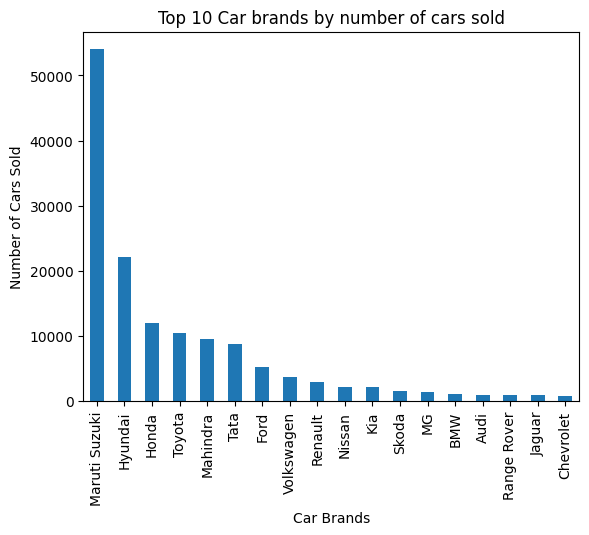

In [79]:
#1.Top 10 car brands by number of cars sold
top_10_brands = car_data['brand'].value_counts().plot(kind='bar', title='Top 10 Car brands by number of cars sold')
plt.xlabel('Car Brands')
plt.ylabel('Number of Cars Sold')
plt.show()

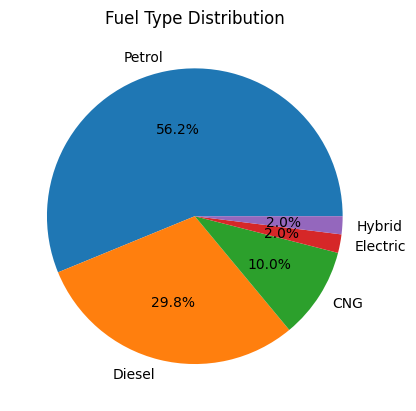

In [66]:
#2.Fuel type distribution
fuel_distribution = car_data['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Fuel Type Distribution')
plt.ylabel('')
plt.show()

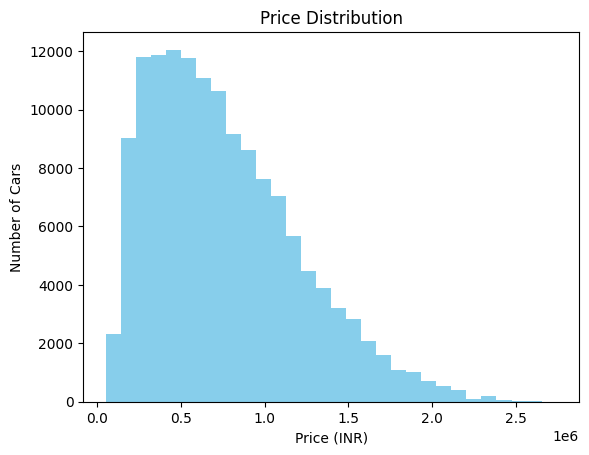

In [68]:
#3.Price distribution
price_distribution = car_data['price_inr'].plot(kind='hist', bins=30, title='Price Distribution', color='skyblue')
plt.xlabel('Price (INR)')
plt.ylabel('Number of Cars')
plt.show()

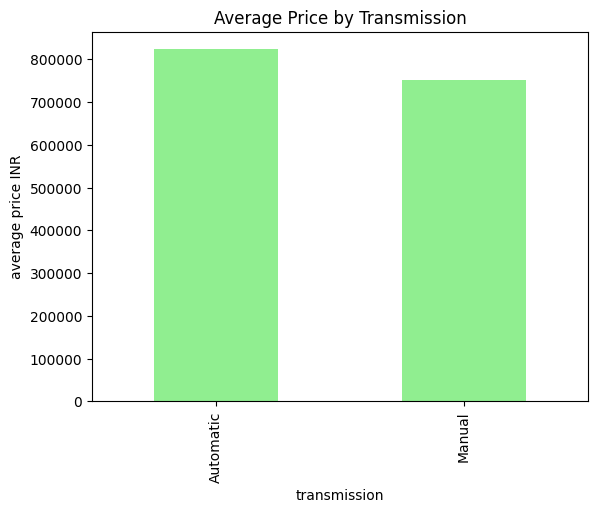

In [69]:
#4.Average price by Transmission
car_data.groupby('transmission')['price_inr'].mean().plot(kind='bar',title='Average Price by Transmission', color='lightgreen')
plt.ylabel('average price INR')
plt.show()

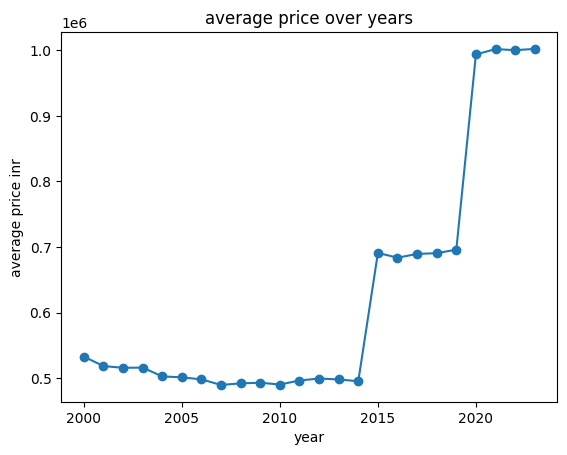

In [71]:
#5.Price Trend by year
car_data.groupby('year')['price_inr'].mean().plot(kind='line',marker='o',title='average price over years')
plt.ylabel('average price inr')
plt.show()

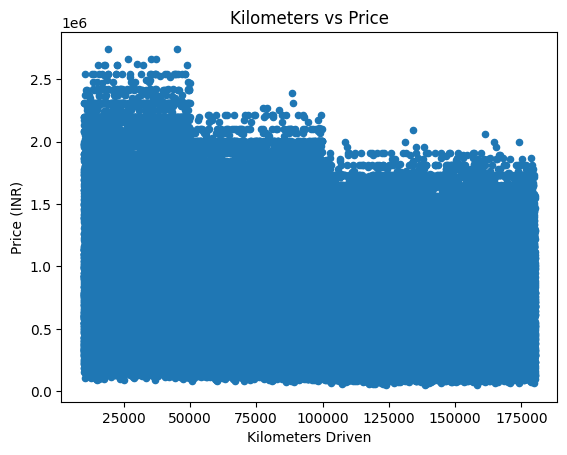

In [72]:
#6.Kilometers vs Price
car_data.plot(kind='scatter',x='kilometers',y='price_inr',title='Kilometers vs Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.show()

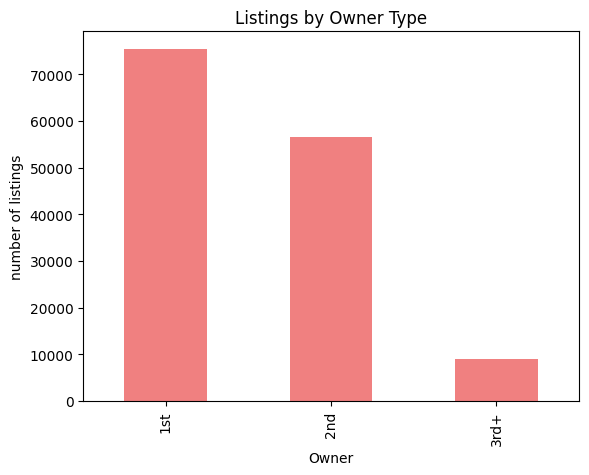

In [74]:
#7.Listings by owner type
car_data['owner'].value_counts().plot(kind='bar',title='Listings by Owner Type', color='lightcoral')
plt.xlabel('Owner')
plt.ylabel('number of listings')
plt.show()

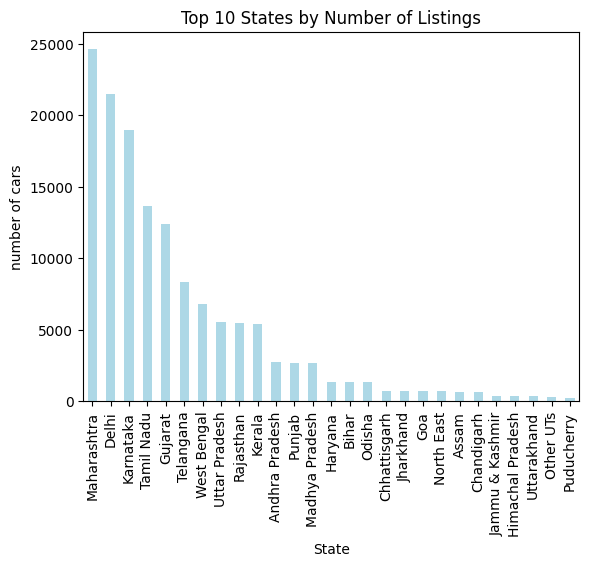

In [80]:
#8.Listing by State
car_data['state'].value_counts().plot(kind='bar', title='Top 10 States by Number of Listings', color='lightblue')
plt.xlabel('State')
plt.ylabel('number of cars')
plt.show()

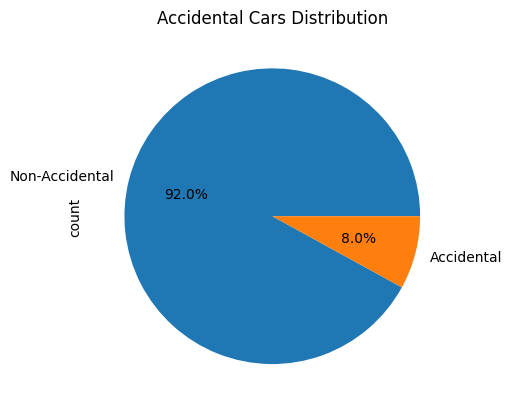

In [78]:
car_data['accidental'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Accidental Cars Distribution',labels=['Non-Accidental','Accidental'])
plt.show()

In [81]:
import sqlalchemy as sal
engine = sal.create_engine('mssql://KARISHMA\SQLEXPRESS/master?driver=ODBC+Driver+17+for+SQL+Server')
conn= engine.connect()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\karis\AppData\Local\Temp\ipykernel_14788\350624761.py:2: SyntaxWarning: invalid escape sequence '\S'
  engine = sal.create_engine('mssql://KARISHMA\SQLEXPRESS/master?driver=ODBC+Driver+17+for+SQL+Server')


In [85]:
car_data.to_sql('car_sales',con=conn,if_exists='append',index=False)

29

In [84]:
car_data.columns

Index(['car_id', 'brand', 'model_name', 'model_variant', 'car_type',
       'transmission', 'fuel_type', 'year', 'kilometers', 'owner', 'state',
       'accidental', 'price_inr'],
      dtype='object')

In [87]:
#Data Preprocessing

car_data = pd.get_dummies(car_data, columns=['brand', 'model_name', 'model_variant', 'car_type', 
                                 'transmission', 'fuel_type','owner', 'state', 'accidental'], 
                    drop_first=True)

In [90]:
#Spliting into Training and Testing Data

from sklearn.model_selection import train_test_split

X = car_data.drop('price_inr', axis=1)  # Features
y = car_data['price_inr']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 307116.60897887277
R² Score: 0.277364418957158


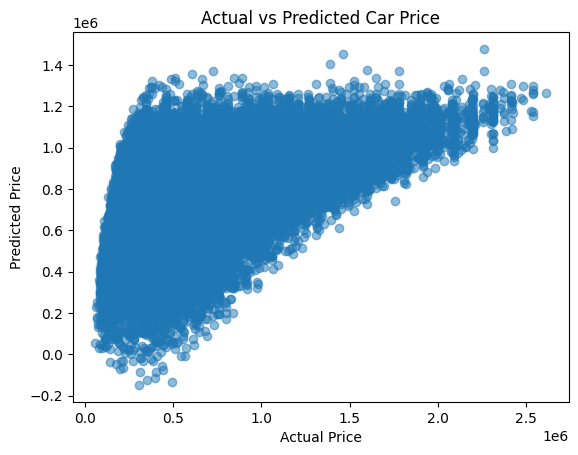

In [92]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.show()
